<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/BABA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

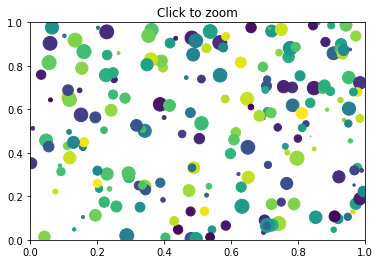

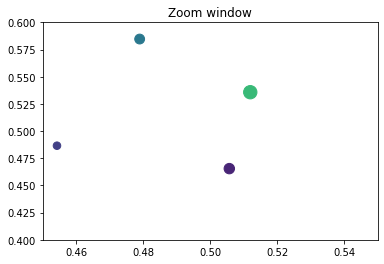

In [8]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

figsrc, axsrc = plt.subplots()
figzoom, axzoom = plt.subplots()
axsrc.set(xlim=(0, 1), ylim=(0, 1), autoscale_on=False,
          title='Click to zoom')
axzoom.set(xlim=(0.45, 0.55), ylim=(0.4, 0.6), autoscale_on=False,
           title='Zoom window')

x, y, s, c = np.random.rand(4, 200)
s *= 200

axsrc.scatter(x, y, s, c)
axzoom.scatter(x, y, s, c)


def on_press(event):
    if event.button != 1:
        return
    x, y = event.xdata, event.ydata
    axzoom.set_xlim(x - 0.1, x + 0.1)
    axzoom.set_ylim(y - 0.1, y + 0.1)
    figzoom.canvas.draw()

figsrc.canvas.mpl_connect('button_press_event', on_press)
plt.show()

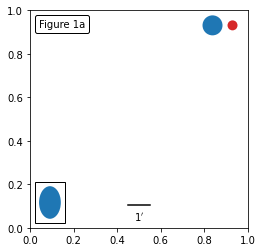

In [26]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Ellipse
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)


def draw_text(ax):
    """Draw a text-box anchored to the upper-left corner of the figure."""
    box = AnchoredOffsetbox(child=TextArea("Figure 1a"),
                            loc="upper left", frameon=True)
    box.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(box)


def draw_circles(ax):
    """Draw circles in axes coordinates."""
    area = DrawingArea(40, 20, 0, 0)
    area.add_artist(Circle((10, 10), 10, fc="tab:blue"))
    area.add_artist(Circle((30, 10), 5, fc="tab:red"))
    box = AnchoredOffsetbox(
        child=area, loc="upper right", pad=0, frameon=False)
    ax.add_artist(box)


def draw_ellipse(ax):
    """Draw an ellipse of width=0.1, height=0.15 in data coordinates."""
    aux_tr_box = AuxTransformBox(ax.transData)
    aux_tr_box.add_artist(Ellipse((0, 0), width=0.1, height=0.15))
    box = AnchoredOffsetbox(child=aux_tr_box, loc="lower left", frameon=True)
    ax.add_artist(box)


class AnchoredSizeBar(AnchoredOffsetbox):
    def __init__(self, transform, size, label, loc,
                 pad=0.1, borderpad=0.1, sep=2, prop=None, frameon=True):
        """
        Draw a horizontal bar with the size in data coordinate of the given
        axes. A label will be drawn underneath (center-aligned).

        pad, borderpad in fraction of the legend font size (or prop)
        sep in points.
        """
        self.size_bar = AuxTransformBox(transform)
        self.size_bar.add_artist(Line2D([0, size], [0, 0], color="black"))
        self.txt_label = TextArea(label)
        self._box = VPacker(children=[self.size_bar, self.txt_label],
                            align="center",
                            pad=0, sep=sep)
        super().__init__(loc, pad=pad, borderpad=borderpad,
                         child=self._box, prop=prop, frameon=frameon)


def draw_sizebar(ax):
    """
    Draw a horizontal bar with length of 0.1 in data coordinates,
    with a fixed label underneath.
    """
    asb = AnchoredSizeBar(ax.transData,
                          0.1,
                          r"1$^{\prime}$",
                          loc='lower center',
                          pad=0.1, borderpad=0.5, sep=5,
                          frameon=False)
    ax.add_artist(asb)


fig, ax = plt.subplots()
ax.set_aspect(1)

draw_text(ax)
draw_circles(ax)
draw_ellipse(ax)
draw_sizebar(ax)

plt.show()

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


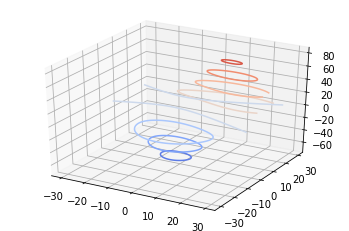

In [28]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.contour(X, Y, Z, cmap=cm.coolwarm)  # Plot contour curves

plt.show()

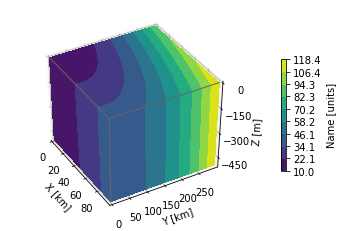

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set distance and angle view
ax.view_init(40, -30)
ax.dist = 11

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

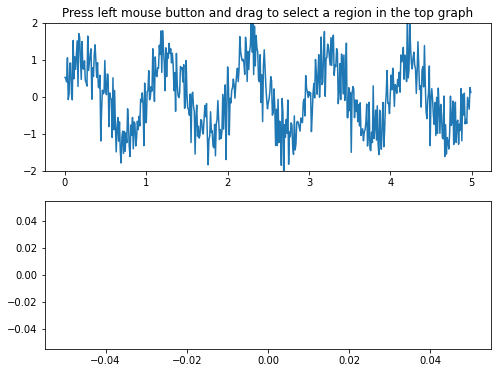

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import SpanSelector

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

x = np.arange(0.0, 5.0, 0.01)
y = np.sin(2 * np.pi * x) + 0.5 * np.random.randn(len(x))

ax1.plot(x, y)
ax1.set_ylim(-2, 2)
ax1.set_title('Press left mouse button and drag '
              'to select a region in the top graph')

line2, = ax2.plot([], [])


def onselect(xmin, xmax):
    indmin, indmax = np.searchsorted(x, (xmin, xmax))
    indmax = min(len(x) - 1, indmax)

    region_x = x[indmin:indmax]
    region_y = y[indmin:indmax]

    if len(region_x) >= 2:
        line2.set_data(region_x, region_y)
        ax2.set_xlim(region_x[0], region_x[-1])
        ax2.set_ylim(region_y.min(), region_y.max())
        fig.canvas.draw_idle()

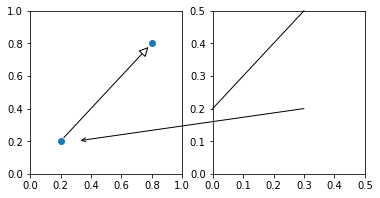

In [39]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Draw a simple arrow between two points in axes coordinates
# within a single axes.
xyA = (0.2, 0.2)
xyB = (0.8, 0.8)
coordsA = "data"
coordsB = "data"
con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                      arrowstyle="-|>", shrinkA=5, shrinkB=5,
                      mutation_scale=20, fc="w")
ax1.plot([xyA[0], xyB[0]], [xyA[1], xyB[1]], "o")
ax1.add_artist(con)

# Draw an arrow between the same point in data coordinates,
# but in different axes.
xy = (0.3, 0.2)
con = ConnectionPatch(
    xyA=xy, coordsA=ax2.transData,
    xyB=xy, coordsB=ax1.transData,
    arrowstyle="->", shrinkB=5)
fig.add_artist(con)

# Draw a line between the different points, defined in different coordinate
# systems.
con = ConnectionPatch(
    # in axes coordinates
    xyA=(0.6, 1.0), coordsA=ax2.transAxes,
    # x in axes coordinates, y in data coordinates
    xyB=(0.0, 0.2), coordsB=ax2.get_yaxis_transform(),
    arrowstyle="-")
ax2.add_artist(con)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax2.set_xlim(0, .5)
ax2.set_ylim(0, .5)

plt.show()